## Question 1

Train
[0 1] [1521  909] [0.62592593 0.37407407]
Test
[0 1] [169 101] [0.62592593 0.37407407]


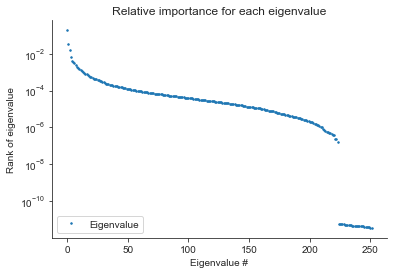

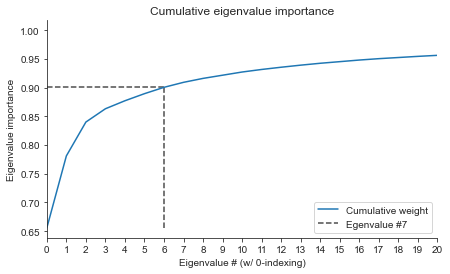

0.9005458373120733


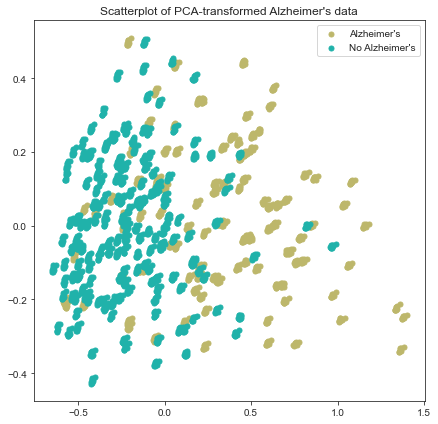

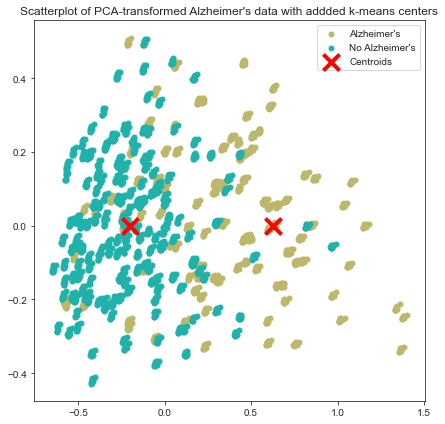

Train 0-1 loss is 1.0
Test 0-1 loss is 1.0
sqrt
oob: 1.0
train: 1.0
test: 1.0

all
oob: 0.9991769547325103
train: 1.0
test: 1.0


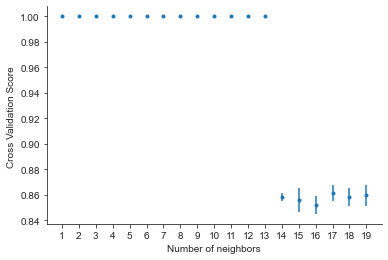

1.0
1.0


In [5]:
# 1.1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

# Find the data
train_input = np.genfromtxt("data/trainInput.csv",delimiter = ",")
train_target = np.genfromtxt("data/trainTarget.csv",delimiter = ",").astype(int)
test_input = np.genfromtxt("data/testInput.csv",delimiter = ",")
test_target = np.genfromtxt("data/testTarget.csv",delimiter = ",").astype(int)


#1.2
print("Train")
n, c = np.unique(train_target, return_counts = True)
print(n,c,c/len(train_target))
print("Test")
n, c = np.unique(test_target, return_counts = True)
print(n,c,c/len(test_target))

# 1.3

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()

# scale = StandardScaler()
# norm = scale.fit_transform(train_input)
cent = (train_input - train_input.mean(axis = 0))
pca.fit(cent)
eigenvalues = pca.explained_variance_

fig, axs = plt.subplots()

axs.plot(eigenvalues,'.',markersize = 3,label="Eigenvalue")
# ins = axs.inset_axes((0.95,0.2,0.6,0.6))
# ins.plot(eigenvalues,'.',markersize = 10)
# ins.set_xlim(-0.5,6.5)
# ins.set_ylim(-0.005,0.2)

# axs.indicate_inset_zoom(ins,edgecolor="black")
axs.set_xlabel("Eigenvalue #")
axs.set_ylabel("Rank of eigenvalue")

axs.set_yscale("log")

# ins.set_xlabel("Eigenvalue #")
# ins.set_ylabel("Relative importance")

axs.set_title("Relative importance for each eigenvalue")
axs.legend(loc = "lower left")
sns.despine()
plt.show()




def find_90():
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    for n, cu in enumerate(cumvar):
        if cu >= 0.9:
            return n

N = find_90()

cumvar = np.cumsum(pca.explained_variance_ratio_)

        
fig, ax = plt.subplots(1,1,figsize = (7,4))
ax.plot([i for i in range(len(cumvar))],cumvar,label = "Cumulative weight")
ax.set_xlabel("Eigenvalue # (w/ 0-indexing)")
ax.set_ylabel("Eigenvalue importance")
ax.vlines(N,min(cumvar),cumvar[N],ls= '--',color="black",alpha = 0.7,label = "Egenvalue #"+str(N+1))
ax.hlines(cumvar[N],0,N,ls= '--',color="black",alpha = 0.7)

# ax.set_xscale("log")
ax.set_xlim(0,20)
ax.set_xticks([i for i in range(21)])
sns.despine()
plt.legend(loc = "lower right")
ax.set_title("Cumulative eigenvalue importance")
plt.show()
print(cumvar[N])


#TODO tæller fra 0


X = pca.transform(cent)

plt.figure(figsize = (7,7))


type1, type2 = X[train_target == 1],X[train_target == 0]

a, s = 1, 100


plt.scatter(type1[:, 0], type1[:, 1], c ="darkkhaki", s=s,marker = '.',cmap = "PRGn",alpha =a,label="Alzheimer's")
plt.scatter(type2[:, 0], type2[:, 1], c = "lightseagreen", s=s,marker = '.',cmap = "PRGn",alpha =a,label="No Alzheimer's")
plt.legend()
plt.title("Scatterplot of PCA-transformed Alzheimer's data")
plt.show()

# I am implementing the k-means clustering algorithm as described in the slides and choosing k=2 as the assignment requires

data = cent

dist = lambda x: np.sum([xx*xx for xx in x])

k = 2

# centroids = np.random.uniform(low = np.min(data),high = np.max(data),size = (k,len(data[0])))
centroids = np.array([data[train_target == kk][0] for kk in range(k)])
last_centroids = centroids.copy()


convergence = 1e-11

assigns = np.zeros(len(data)).astype(int)

while True:
    for i,d in enumerate(data):
        lowest = 1000
        for k,c in enumerate(centroids):
            if dist(c-d) < lowest:
                lowest = dist(c-d)
                assigns[i] = k
                
    for i in range(len(centroids)):
        centroids[i] = np.mean(data[assigns == i],axis = 0)  
        
    if np.sum(centroids - last_centroids) < convergence:
        break
    else:
        last_centroids = centroids.copy()
        



X_centers = pca.transform(centroids)


plt.figure(figsize = (7,7))

type1, type2 = X[train_target == 1],X[train_target == 0]

a, s = 1, 100

plt.scatter(type1[:, 0], type1[:, 1], c ="darkkhaki",s=s,marker = '.',cmap = "PRGn",alpha =a,label="Alzheimer's")
plt.scatter(type2[:, 0], type2[:, 1], c = "lightseagreen",s=s,marker = '.',cmap = "PRGn",alpha =a,label="No Alzheimer's")
plt.scatter(X_centers[:, 0], X_centers[:, 1],c ="red",s= 260,linewidths = 4,marker = "x",label = "Centroids")
plt.legend()
plt.title("Scatterplot of PCA-transformed Alzheimer's data with addded k-means centers")
plt.show()

# 1.4

# Logistic Regression

# Apply multi-nominal logistic regression. If you use regularization, describe
# the type of regularization you used. Report training and test loss (in terms
# of 0-1 loss).


from sklearn.linear_model import LogisticRegression


X = train_input
y = train_target

X_test, y_test = test_input, test_target

lr = LogisticRegression(multi_class = "multinomial", penalty = "none", max_iter = 200)

lr.fit(X,y)

print("Train 0-1 loss is",sum(y == lr.predict(X))/len(y))
print("Test 0-1 loss is",sum(y_test == lr.predict(X_test))/len(y_test))

# RandomForest

from sklearn.ensemble import RandomForestClassifier

data = train_input

n_features = len(data[0])

rf_sqrt = RandomForestClassifier(n_estimators = 200,oob_score = True,max_features = "sqrt")
rf_all  = RandomForestClassifier(n_estimators = 200,oob_score = True,max_features = None)

rf_sqrt.fit(data,train_target)
rf_all.fit(data,train_target)

print("sqrt")
print("oob:",rf_sqrt.oob_score_)
pred = rf_sqrt.predict(train_input)
print("train:", np.sum(pred == train_target)/len(train_target))
pred = rf_sqrt.predict(test_input)
print("test:", np.sum(pred == test_target)/len(test_target))

print("")
print("all")
print("oob:",rf_all.oob_score_)
pred = rf_all.predict(train_input)
print("train:", np.sum(pred == train_target)/len(train_target))
pred = rf_all.predict(test_input)
print("test:", np.sum(pred == test_target)/len(test_target))

# KNN

# Apply k-nearest-neighbor classification. Use cross-validation to determine
# the number of neighbors. Report training and test loss (in terms of 0-1
# loss). Describe how you determined the number of neighbors.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(train_input)
X = train_input
y = train_target
## All of this is stolen from my own assignment 1:

big = False
if big:
    allscores, allstds = [], []
    for cv in range(2,12):
        scores, stds = [], []
        for i in range(1,20):
            dt = KNeighborsClassifier(n_neighbors = i)
            score = cross_val_score(dt, X, y, cv=cv)
            scores.append(score.mean())
            stds.append(score.std())

        allscores.append(scores)
        allstds.append(stds)

    scores = np.mean(np.array(allscores),axis = 0)
    stds = np.mean(np.array(allstds),axis = 0)
else:
    scores, stds = [], []
    for i in range(1,20):
        dt = KNeighborsClassifier(n_neighbors = i)
        score = cross_val_score(dt, X, y, cv=5)
        scores.append(score.mean())
        stds.append(score.std())

    



plt.errorbar([i+1 for i in range(len(scores))],scores, yerr = stds,fmt='.')
sns.despine()
plt.xlabel("Number of neighbors")
plt.ylabel("Cross Validation Score ")
plt.xticks([i+1 for i in range(19)])
plt.show()





X = train_input
y = train_target

kn = KNeighborsClassifier(n_neighbors = 1)

kn.fit(X,y)
print(np.sum(y == kn.predict(X))/len(y))

print(np.sum(test_target == kn.predict(test_input))/len(test_target))





## Question 5

(100, 15, 5)
(15,)
(15,)


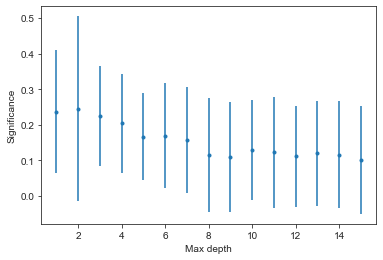

Best: 15


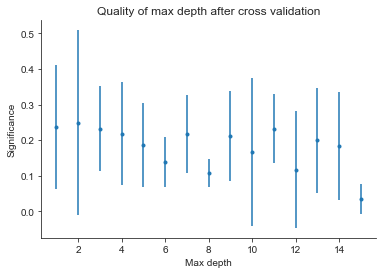

15
DecisionTreeRegressor(max_depth=15)


C:\Users\jakob\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


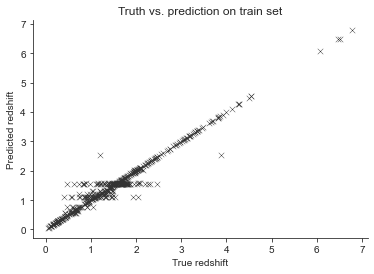

C:\Users\jakob\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


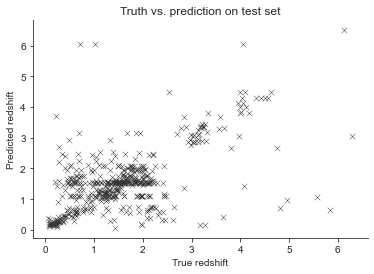

Train MSE is 0.04143442371349366
Test MSE is 0.8687747705994731


C:\Users\jakob\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


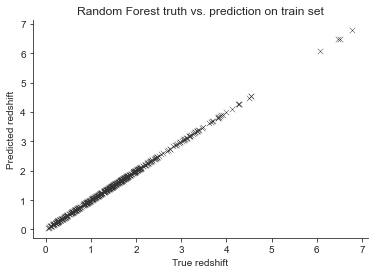

C:\Users\jakob\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


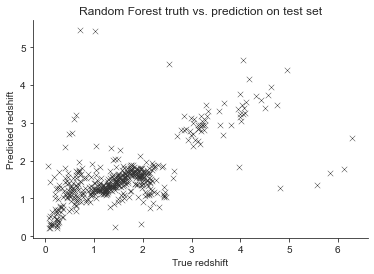

Train MSE is 1.5921541747774377e-28
Test MSE is 0.5982936650569743


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

# import data
train = pd.read_csv("data/galaxies_train.csv")
test = pd.read_csv("data/galaxies_test.csv")


# find labels
X, y =  train.iloc[:,1:],  train["redshift"]
X_test, y_test =  test.iloc[:,1:],  test["redshift"]

train.head()


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

ascores, astds = [], []
for _ in range(100):
    scores, stds = [], []
    
    for i in range(1,16):
        dt = DecisionTreeRegressor(max_depth = i)
        score = cross_val_score(dt, X, y, cv=5)#,scoring = "neg_mean_squared_error")
        scores.append(score)
#         stds.append(score.std())
    ascores.append(scores)
#     astds.append(stds)

asc = np.array(ascores)


scores = np.mean(asc,axis = (0,2))
stds = np.std(asc,axis = (0,2))

print(asc.shape)
print(scores.shape)
print(stds.shape)


plt.errorbar([i+1 for i in range(len(scores))],scores, yerr = stds, fmt='.')
plt.xlabel("Max depth")
plt.ylabel("Significance")

plt.show()
best = np.argmin(scores) + 1
print("Best:",best)

scores, stds = [], []

for i in range(1,16):
    dt = DecisionTreeRegressor(max_depth = i)
    score = cross_val_score(dt, X, y, cv=5)#,scoring = "neg_mean_squared_error")
    scores.append(score.mean())
    stds.append(score.std())


plt.errorbar([i+1 for i in range(len(scores))],scores, yerr = stds, fmt='.')
plt.xlabel("Max depth")
plt.ylabel("Significance")
sns.despine()
plt.title("Quality of max depth after cross validation")
plt.show()
best = np.argmin(scores) + 1
print(best)
dt = DecisionTreeRegressor(max_depth = best)
print(dt)
dt.fit(X,y)


pred = dt.predict(X)

sns.scatterplot(y,pred, s= 30,color=".2",marker = 'x')
plt.xlabel("True redshift")
plt.ylabel("Predicted redshift")
plt.title("Truth vs. prediction on train set")
sns.despine()
plt.show()
sns.scatterplot(y_test,dt.predict(X_test), s= 30,color=".2",marker = 'x')
plt.xlabel("True redshift")
plt.ylabel("Predicted redshift")
plt.title("Truth vs. prediction on test set")
sns.despine()
plt.show()
print("Train MSE is", MSE(y,pred))
print("Test MSE is", MSE(y_test,dt.predict(X_test)))

from sklearn.ensemble import ExtraTreesRegressor

er = ExtraTreesRegressor(n_estimators = 500)

er.fit(X,y)

pred = er.predict(X)

sns.scatterplot(y,pred, s= 30,color=".2",marker = 'x')
plt.xlabel("True redshift")
plt.ylabel("Predicted redshift")
plt.title("Random Forest truth vs. prediction on train set")
sns.despine()
plt.show()
sns.scatterplot(y_test,er.predict(X_test), s= 30,color=".2",marker = 'x')
plt.xlabel("True redshift")
plt.ylabel("Predicted redshift")
plt.title("Random Forest truth vs. prediction on test set")
sns.despine()
plt.show()
print("Train MSE is", MSE(y,pred))
print("Test MSE is", MSE(y_test,er.predict(X_test)))

# Ummidelbart ja, da random netop ikke optimerer overhovedet
